## Fresh and rotten fruits for classification

## Objective

 To train a neural network model that can distinguish between fresh and rotten fruits as a classification problem. 

## Datasets (Source & Acknowledgements)

1. An extensive dataset for successful recognition of fresh and rotten fruits https://www.sciencedirect.com/science/article/pii/S2352340922007594 </br>
Sultana, Nusrat; Jahan, Musfika; Uddin, Mohammad Shorif (2022) Data in Brief 44: 108552 </br>
Dataset: “Fresh and Rotten Fruits Dataset for Machine-Based Evaluation of Fruit Quality”, Mendeley Data, V1, doi: 10.17632/bdd69gyhv8.1

2. Fruits fresh and rotten for classification https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification </br>

In [1]:
## Import Libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from distutils.dir_util import copy_tree

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

## Compile the images into the respective folders for training, validating and testing

1. Publication Mendeley dataset: 

Fruit images from the fresh apple, rotten apple, fresh banana, rotten banana, fresh orange, rotten orange categories are used for training, validating and testing, with a few unseen/novel images from fresh guava, rotten guava, fresh pomegranate, rotten pomegranate categories used for testing. </br> 

Original images are distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits, and some images are placed into a test2 folder for testing; Augmented image files are renamed with a prefix "Aug" and distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits. </br>

2. Kaggle dataset: 

Fruit images from the fresh apple, rotten apple, fresh banana, rotten banana, fresh orange, rotten orange categories are used for training and validating. </br>

Images are distributed into mixed_train (training)/mixed_valid (validating) folders for both freshfruits and rottenfruits, and some are placed into a test2 folder for testing

In [2]:
train_folder = './dataset/train'
test_folder = './dataset/test'

# Make a new train folder with fresh fruits
toDirectory = './dataset/train/mixed_train/freshfruits';

fromDirectory = train_folder + '/AugFreshApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/AugFreshBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/AugFreshOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/FreshApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/FreshBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/FreshOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

# Make a new train folder with rotten fruits
toDirectory = './dataset/train/mixed_train/rottenfruits';

fromDirectory = train_folder + '/AugRottenApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/AugRottenBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/AugRottenOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/RottenApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/RottenBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/RottenOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

# Make a new validation folder with fresh fruits
toDirectory = './dataset/test/mixed_valid/freshfruits';

fromDirectory = test_folder + '/AugFreshApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/AugFreshBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/AugFreshOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/FreshApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/FreshBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/FreshOrange';
copy_tree(fromDirectory, toDirectory);

# Make a new validation folder with rotten fruits
toDirectory = './dataset/test/mixed_valid/rottenfruits';

fromDirectory = test_folder + '/AugRottenApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/AugRottenBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/AugRottenOrange';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/RottenApple';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/RottenBananas';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/RottenOrange';
copy_tree(fromDirectory, toDirectory);

## Augment images

In [3]:
# use Keras' ImageDataGenerator to generate augmented images to increase dataset size
datagen_train = ImageDataGenerator(
rescale=1/255.0,
rotation_range = 10,
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range = 0.1,
horizontal_flip = True,
vertical_flip = False,)

datagen_valid = ImageDataGenerator(
rescale=1/255.0)

## Load and iterate both training and validation datasets

In [4]:
# load and iterate training dataset
train_data = datagen_train.flow_from_directory(
    "./dataset/train/mixed_train",
    target_size=(224,224),    
    color_mode="rgb",
    class_mode="binary",
)
# load and iterate validation dataset
valid_data = datagen_valid.flow_from_directory(
    "./dataset/test/mixed_valid",
    target_size=(224,224),    
    color_mode="rgb",
    class_mode="binary",
)

Found 15438 images belonging to 2 classes.
Found 5552 images belonging to 2 classes.


In [5]:
train_data.class_indices

{'freshfruits': 0, 'rottenfruits': 1}

In [6]:
# Dictionary with key and correct values as labels
image_class_dict={0:'freshfruits',
 1:'rottenfruits'}

## Plot the fruit images in the training dataset

In [7]:
# Ploting Images
def plot_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

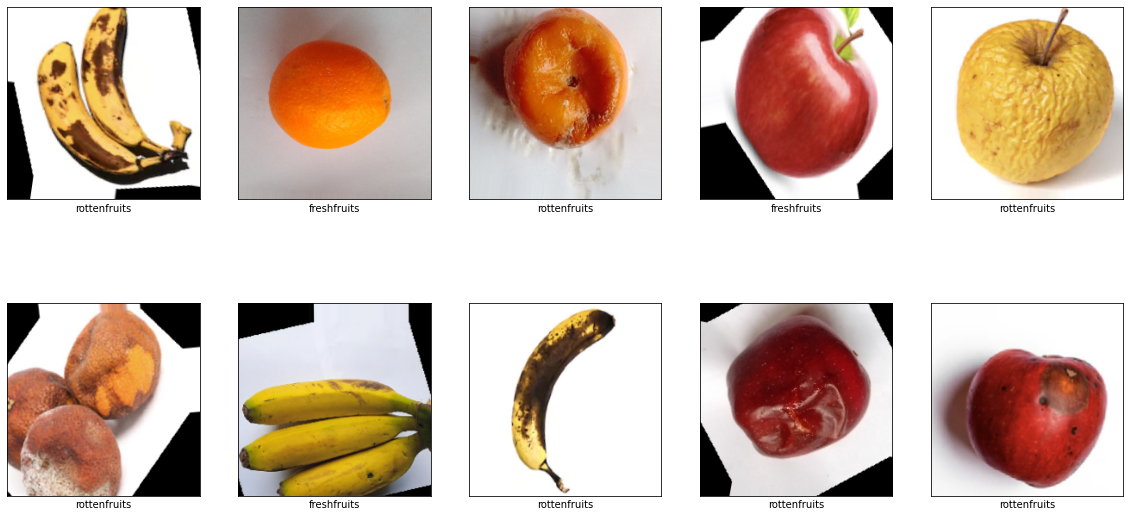

In [8]:
plot_images()

## Load ImageNet Base Model

In [9]:
# Load MobileNet V2 as the base model
base_model = keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


## Freeze the base model 

In [10]:
# Freeze base model so that all the pre-trained learning from the ImageNet dataset are retained in the initial training.
base_model.trainable = False

## Add layers to the model

In [11]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)

# Add global average pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer with one unit neuron for binary classification using sigmoid as the activation function
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)

In [12]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


## Compile the model

In [13]:
# use binary crossentropy for binary classification and assess the performance using accuracy as the metrics
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# use EarlyStopping in the case when val_accuracy reaches a plateau (not improving much)
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    restore_best_weights=True, 
    patience=2, 
    min_delta = 0.001)

# create model checkpoint callback to save the best model checkpoint
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="best_checkpoint",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training the model

In [15]:
# train the model for 10 iterations
history = model.fit(train_data,
          validation_data=valid_data,
          steps_per_epoch=train_data.samples/train_data.batch_size,
          validation_steps=valid_data.samples/valid_data.batch_size,
          epochs=10, callbacks=[es, model_checkpoint_callback])

Epoch 1/10
482/482 [==============================] - 441s 910ms/step - loss: 0.2054 - accuracy: 0.9249 - val_loss: 0.1065 - val_accuracy: 0.9625
Epoch 2/10
482/482 [==============================] - 368s 762ms/step - loss: 0.1124 - accuracy: 0.9620 - val_loss: 0.0918 - val_accuracy: 0.9656
Epoch 3/10
482/482 [==============================] - 374s 775ms/step - loss: 0.0903 - accuracy: 0.9701 - val_loss: 0.0806 - val_accuracy: 0.9697
Epoch 4/10
482/482 [==============================] - 364s 755ms/step - loss: 0.0768 - accuracy: 0.9742 - val_loss: 0.0722 - val_accuracy: 0.9741
Epoch 5/10
482/482 [==============================] - 362s 750ms/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.0651 - val_accuracy: 0.9777
Epoch 6/10
482/482 [==============================] - 363s 752ms/step - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0714 - val_accuracy: 0.9733
Epoch 7/10
482/482 [==============================] - 365s 756ms/step - loss: 0.0605 - accuracy: 0.9787 - val_loss: 0.0563 -

## Evaluate the model

In [17]:
# evaluate the model
model.evaluate(valid_data, steps=valid_data.samples/valid_data.batch_size)

173/173 [==============================] - 84s 481ms/step - loss: 0.0563 - accuracy: 0.9798


[0.05628335848450661, 0.9798271059989929]

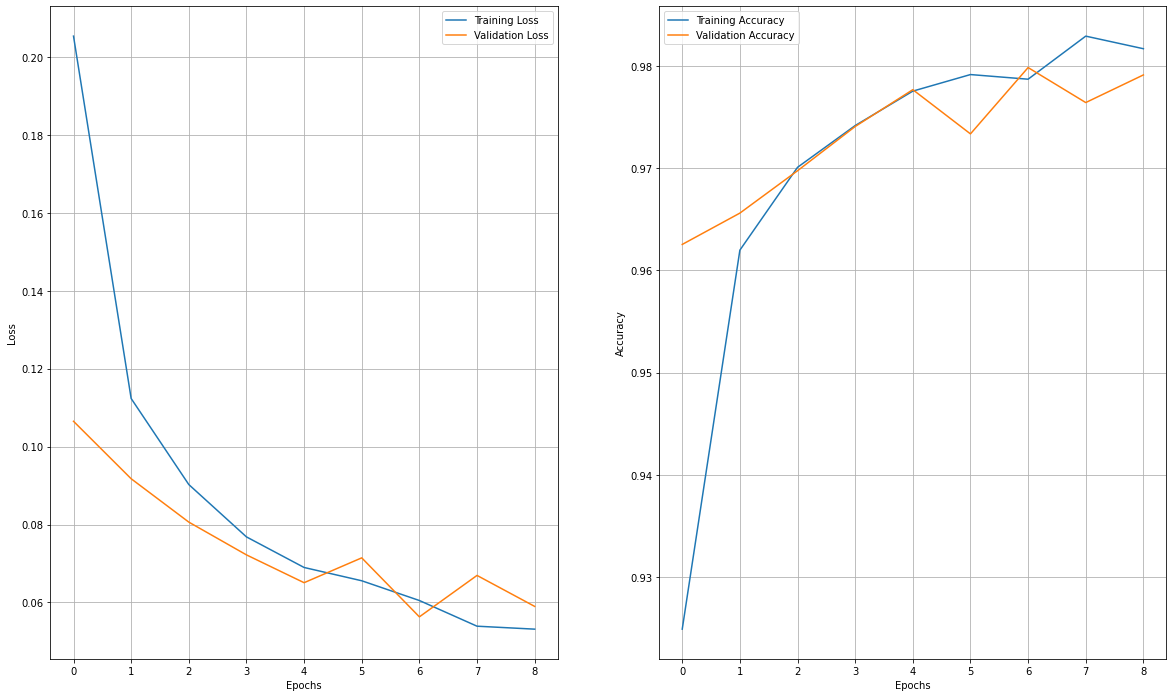

In [18]:
# plot the training/validation loss and the training/validation accuracy curves for comparison
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

## Load and test a new image

In [78]:
# define a function that takes in an image and display it
def show_test_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

## Preprocess the test image and perform predictions on it

In [79]:
# define a function that preprocess an image and perform predictions on it
def predictions(image_path):
    show_test_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [80]:
# define a function that states and classifies whether a fruit image is fresh or rotten based on its probability score
def is_fresh_or_rotten(image_path):
    preds = predictions(image_path)
    print(preds)
    if preds <= 0.5:
        print("It's Fresh and Edible!")
    else:
        print("It's Rotten and Inedible!")

## Sampling the test images

1/1 [==============================] - 0s 47ms/step
[[0.03261651]]
It's Fresh and Edible!


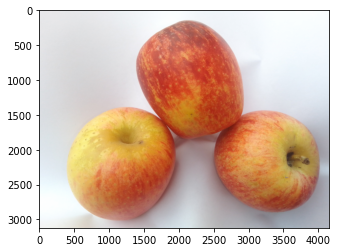

In [81]:
is_fresh_or_rotten('./dataset/test2/FreshApple (29).jpg')

1/1 [==============================] - 0s 20ms/step
[[0.9992056]]
It's Rotten and Inedible!


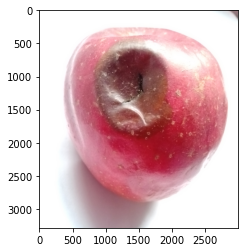

In [82]:
is_fresh_or_rotten('./dataset/test2/RottenApple (20).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.0681157]]
It's Fresh and Edible!


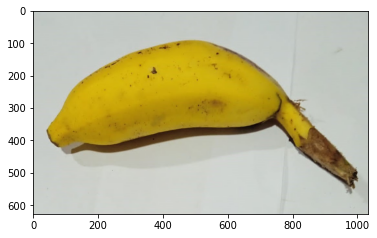

In [83]:
is_fresh_or_rotten('./dataset/test2/FreshBanana (65).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.92868173]]
It's Rotten and Inedible!


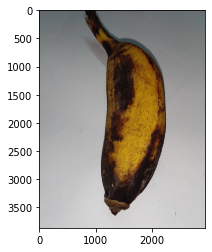

In [84]:
is_fresh_or_rotten('./dataset/test2/RottenBanana (121).jpg')

1/1 [==============================] - 0s 47ms/step
[[0.4485111]]
It's Fresh and Edible!


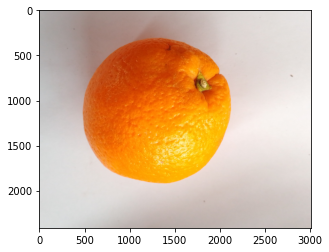

In [85]:
is_fresh_or_rotten('./dataset/test2/FreshOrange (173).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.87264776]]
It's Rotten and Inedible!


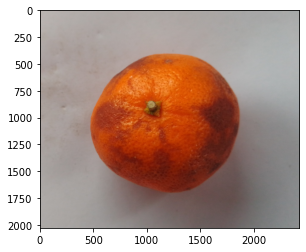

In [86]:
is_fresh_or_rotten('./dataset/test2/RottenOrange (60).jpg')

## Sampling images of previously untrained/unseen fruit categories

1/1 [==============================] - 0s 48ms/step
[[0.1150834]]
It's Fresh and Edible!


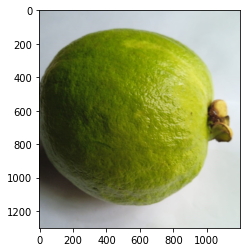

In [87]:
is_fresh_or_rotten('./dataset/test2/FreshGuava (7).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.9990052]]
It's Rotten and Inedible!


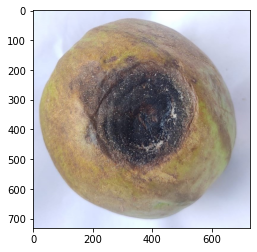

In [88]:
is_fresh_or_rotten('./dataset/test2/RottenGuava (134).jpg')

1/1 [==============================] - 0s 31ms/step
[[0.32001695]]
It's Fresh and Edible!


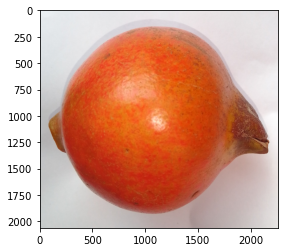

In [89]:
is_fresh_or_rotten('./dataset/test2/FreshPomegranate (12).jpg')

1/1 [==============================] - 0s 47ms/step
[[0.8917469]]
It's Rotten and Inedible!


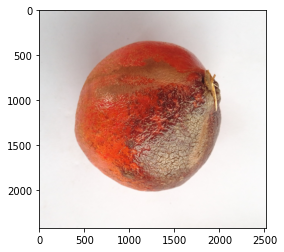

In [90]:
is_fresh_or_rotten('./dataset/test2/RottenPomegranate (18).jpg')

## Conclusion

Classification of the fruit images is accurate for the pre-trained MobileNet V2 model, based on its low validation loss of 0.0563 and high validation accuracy of 0.9798 for 9 epochs.

## End of Notebook